In [37]:
#https://www.youtube.com/watch?v=EvcL_hgJQSg&t=922s
from pandas_datareader import data as reader
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
end = dt.datetime.now()
start = dt.date(end.year - 4,end.month,end.day)
kryptoList = ['BTC-USD']

In [71]:
df =  reader.get_data_yahoo(kryptoList,start,end)

In [72]:
df

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2017-06-24,2589.409912,2589.409912,2682.260010,2552.120117,2607.250000,1.161100e+09
2017-06-25,2478.449951,2478.449951,2615.250000,2376.290039,2590.570068,1.663280e+09
2017-06-26,2552.449951,2552.449951,2552.449951,2332.989990,2478.449951,1.489790e+09
2017-06-27,2574.790039,2574.790039,2603.979980,2484.419922,2553.030029,1.183870e+09
2017-06-28,2539.320068,2539.320068,2588.830078,2510.479980,2567.560059,9.499790e+08
...,...,...,...,...,...,...
2021-06-20,31676.693359,31676.693359,35721.640625,31295.935547,35641.144531,5.280904e+10
2021-06-21,32505.660156,32505.660156,33292.453125,28893.621094,31622.376953,5.896435e+10


In [73]:
#Create a function to get the Simple Moving Average
def SMA(data, period=30, column='Close'):
 return data[column].rolling(window=period).mean()

In [74]:
#create new column to store the short term SMA and the long term SMA
df['ShortSMA']= SMA(df,50)
df['LongSMA']=SMA(df,200)

<function matplotlib.pyplot.show(*args, **kw)>

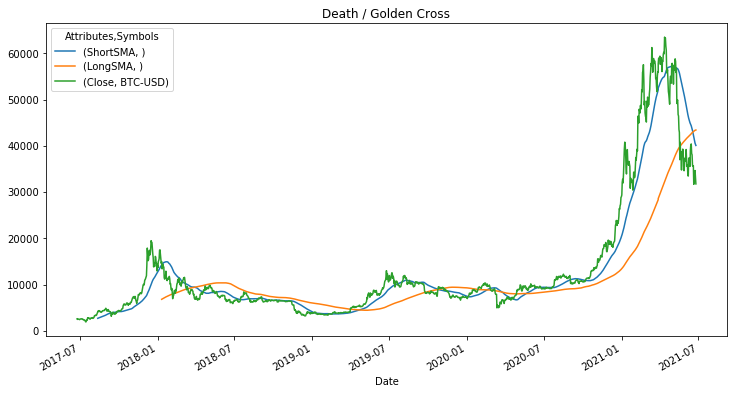

In [75]:
#Plot the chart
#create a list of columns to display
column_list = ['ShortSMA','LongSMA','Close']
df[column_list].plot(figsize=(12.2,6.4))
plt.title('Death / Golden Cross')
plt.show

In [76]:
#create a function to see the dates of each death and golden cross within the data set
def death_golden_cross():
    first_cross=0
    #loop though the length of the data set
    for i in range(0,len(df)):
        if df['ShortSMA'][i] < df['LongSMA'][i] and first_cross == 0:
            print('Death cross on day', df.index[i], ': expect the price to continue to fall')
            first_cross = 1
        elif df['ShortSMA'][i] > df['LongSMA'][i] and first_cross == 1: 
            print('Golden cross on day', df.index[i], ': expect the price to continue to rise')
            first_cross = 0

In [77]:
#show the dates of each death cross and golden cross
death_golden_cross()

Death cross on day 2018-03-29 00:00:00 : expect the price to continue to fall
Golden cross on day 2019-04-23 00:00:00 : expect the price to continue to rise
Death cross on day 2019-10-25 00:00:00 : expect the price to continue to fall
Golden cross on day 2020-02-19 00:00:00 : expect the price to continue to rise
Death cross on day 2020-03-25 00:00:00 : expect the price to continue to fall
Golden cross on day 2020-05-20 00:00:00 : expect the price to continue to rise
Death cross on day 2021-06-18 00:00:00 : expect the price to continue to fall
